### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [563]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [565]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [566]:
# Any missing values?
# Check for missing values
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [567]:
# Explore the data.
print(reviews.columns)  #Column names
print(reviews.shape)    #Number of rows and columnsprint
print(reviews.dtypes)   #Data types

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [568]:
print(reviews.info())   #Determine the metadata of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [569]:
# Descriptive statistics.
print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## 2. Drop columns

In [570]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

print(reviews.shape)    #Number of rows and columnsprint
# View column names.
print(reviews.columns)  #Column names

(2000, 9)
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [571]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'renumeration', 'spending_score (1-100)': 'spending'})

# View column names.
print(reviews.columns)  #Column names

Index(['gender', 'age', 'renumeration', 'spending', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [572]:
# Create a CSV file as output.
# Save the clean DataFrame as a CSV file called clean_reviews
reviews.to_csv('clean_reviews.csv')

In [573]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv('clean_reviews.csv')

# View DataFrame.
print(clean_reviews.shape)    #Number of rows and columnsprint
print(clean_reviews.info())   #Determine the metadata of the data set

(2000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending        2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


## 5. Linear regression

### 5a) spending vs loyalty

In [574]:
# Independent variable.
X = clean_reviews["loyalty_points"]

# Dependent variable.
y = clean_reviews["spending"]

# OLS model and summary.
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = clean_reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          2.92e-263
Time:                        14:07:06   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
X              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [575]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predict values:", test.predict)

Parameters: Intercept    28.426033
X             0.013671
dtype: float64
Standard errors: Intercept    0.684905
X            0.000337
dtype: float64
Predict values: <bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x7fdf7ea34040>>


In [576]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 0.0137.
# Constant coef: 28.4260.
# Create the linear equation.
y_pred = 28.4260 + 0.013671 * X

# View the output.
y_pred

0        31.296910
1        35.589604
2        28.972840
3        36.109102
4        33.429586
           ...    
1995     83.533801
1996     35.794669
1997    105.174994
1998     42.753208
1999     34.974409
Name: loyalty_points, Length: 2000, dtype: float64

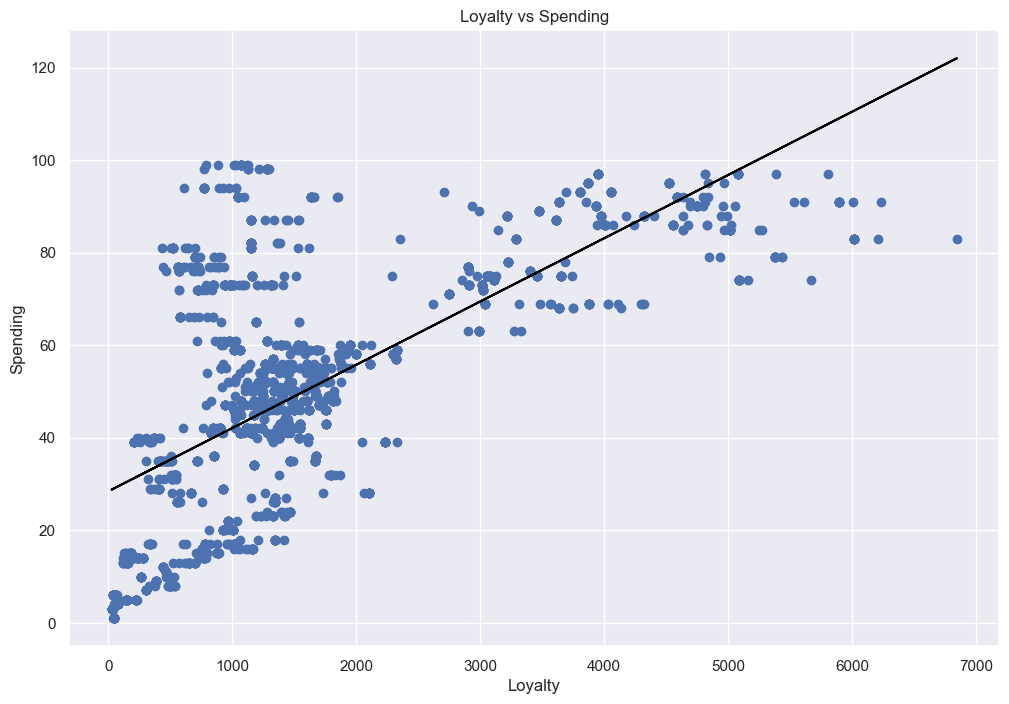

In [577]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

#Label
plt.xlabel('Loyalty')
plt.ylabel('Spending')
plt.title('Loyalty vs Spending')

# View the plot
plt.show()

### 5b) renumeration vs loyalty

In [578]:
# Independent variable.
X = clean_reviews["loyalty_points"]

# Dependent variable.
y = clean_reviews["renumeration"] 

# OLS model and summary.
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = clean_reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          2.43e-209
Time:                        14:07:24   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
X              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [579]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predict values:", test.predict)

Parameters: Intercept    30.560555
X             0.011101
dtype: float64
Standard errors: Intercept    0.645817
X            0.000318
dtype: float64
Predict values: <bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x7fdfa9665f60>>


In [580]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 0.011101.
# Constant coef: 30.560555.
# Create the linear equation.
y_pred = 30.560555 + 0.011101 * X

# View the output.
y_pred

0       32.891765
1       36.377479
2       31.004595
3       36.799317
4       34.623521
          ...    
1995    75.308686
1996    36.543994
1997    92.881569
1998    42.194403
1999    35.877934
Name: loyalty_points, Length: 2000, dtype: float64

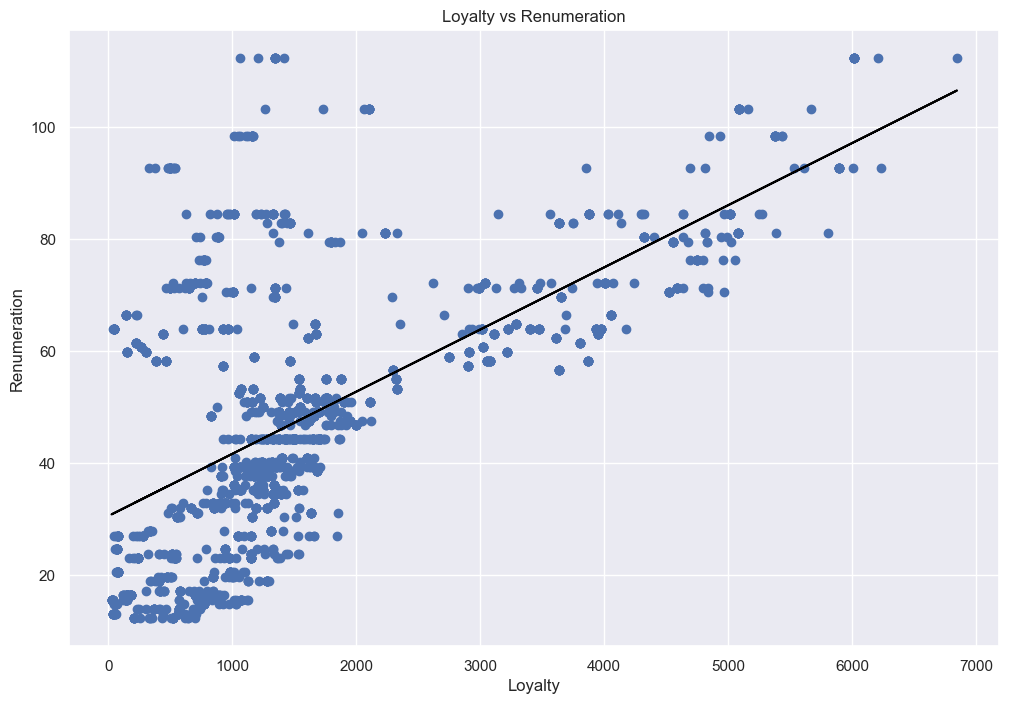

In [581]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

#Label
plt.xlabel('Loyalty')
plt.ylabel('Renumeration')
plt.title('Loyalty vs Renumeration')

# View the plot
plt.show()

### 5c) age vs loyalty

In [582]:
# Independent variable.
X = clean_reviews["loyalty_points"]

# Dependent variable.
y = clean_reviews["age"] 

# OLS model and summary.
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = clean_reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 03 Aug 2023   Prob (F-statistic):             0.0577
Time:                        14:07:41   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
X             -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [583]:
# Extract the estimated parameters.
print("Parameters:", test.params)

# Extract the standard errors.
print("Standard errors:", test.bse)

# Extract the predicted values.
print("Predict values:", test.predict)

Parameters: Intercept    40.203457
X            -0.000449
dtype: float64
Standard errors: Intercept    0.480816
X            0.000236
dtype: float64
Predict values: <bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x7fdf8de1f730>>


In [584]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: -0.000449.
# Constant coef: 40.203457.
# Create the linear equation.
y_pred = 40.203457 + (-0.000449) * X

# View the output.
y_pred

0       40.109167
1       39.968181
2       40.185497
3       39.951119
4       40.039123
          ...    
1995    38.393538
1996    39.961446
1997    37.682771
1998    39.732905
1999    39.988386
Name: loyalty_points, Length: 2000, dtype: float64

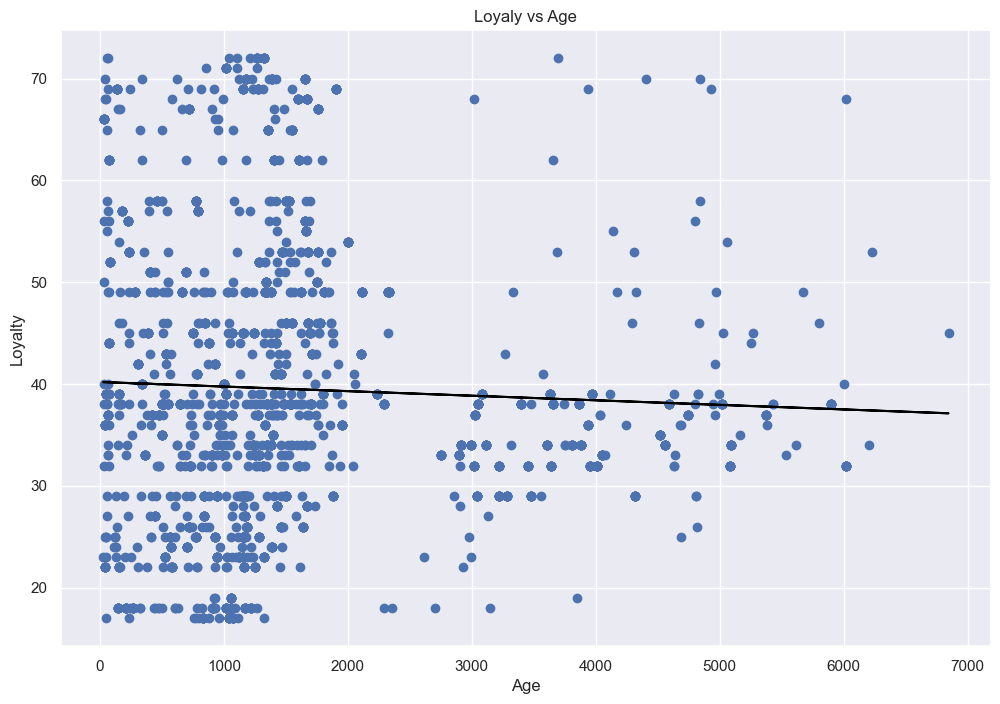

In [585]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

#Label
plt.xlabel('Age')
plt.ylabel('Loyalty')
plt.title('Loyaly vs Age')

# View the plot
plt.show()

## 6. Observations and insights

***Your observations here...***






The initial data exploration and cleaning process ensured the dataset's quality and consistency.Descriptive statistics provided an overview of variable distributions and central tendencies.The removal of redundant columns streamlined the analysis and enhanced clarity.Linear regression analysis will help determine if age, remuneration, and spending scores can predict loyalty points.The OLS model's parameter estimates and standard errors will aid in understanding variable significance.The regression table and scatter plots will visualize the relationships and provide insights into their strengths and directions.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [587]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [588]:
# Load the CSV file(s) as df2 from the CSV file created in the previous sector
df2 = pd.read_csv('clean_reviews.csv')

# View DataFrame.
df2.head()
print(df2.shape)    #Number of rows and columnsprint
print(df2.info())   #Determine the metadata of the data set

(2000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending        2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


In [589]:
# Drop unnecessary columns.
# Keep the new df with renumeration and spending only
df2_clean = df2[['renumeration', 'spending']]

# View the DataFrame.
print(df2_clean.shape)    #Number of rows and columnsprint
print(df2_clean.info())   #Determine the metadata of the data set

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   renumeration  2000 non-null   float64
 1   spending      2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


In [590]:
# Explore the data.
print(df2_clean.columns)  #Column names
print(df2_clean.dtypes)   #Data types

Index(['renumeration', 'spending'], dtype='object')
renumeration    float64
spending          int64
dtype: object


In [591]:
# Descriptive statistics.
print(df2_clean.describe())

       renumeration     spending
count   2000.000000  2000.000000
mean      48.079060    50.000000
std       23.123984    26.094702
min       12.300000     1.000000
25%       30.340000    32.000000
50%       47.150000    50.000000
75%       63.960000    73.000000
max      112.340000    99.000000


## 2. Plot

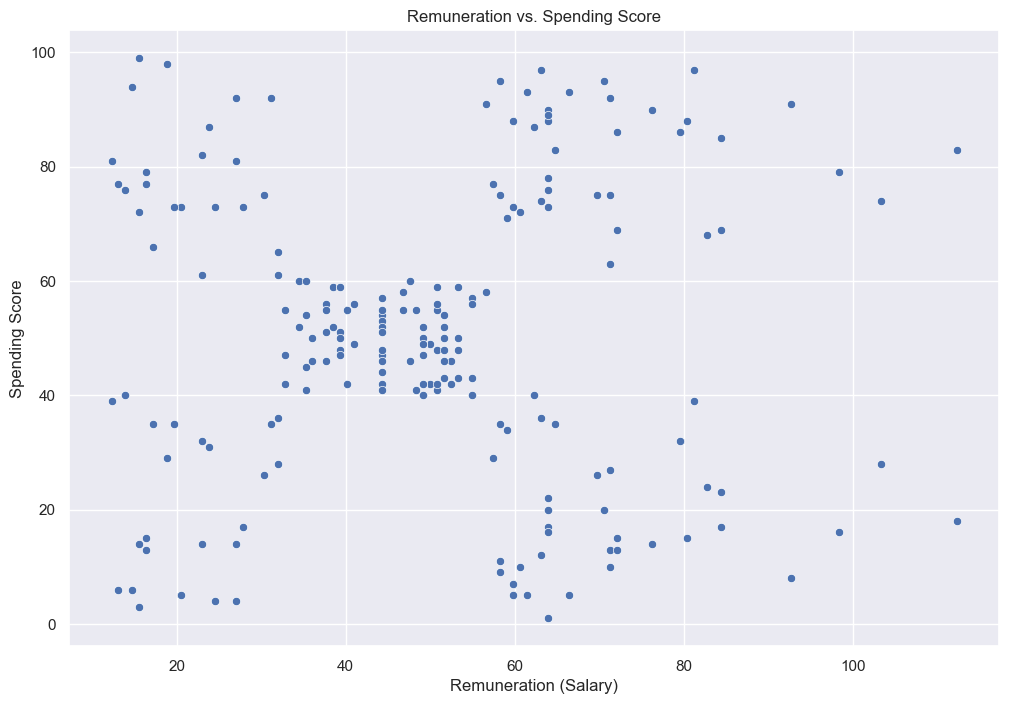

In [592]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending',
                data=df2_clean)

#Labels
plt.xlabel('Remuneration (Salary)')
plt.ylabel('Spending Score')
plt.title('Remuneration vs. Spending Score')

#View data
plt.show()

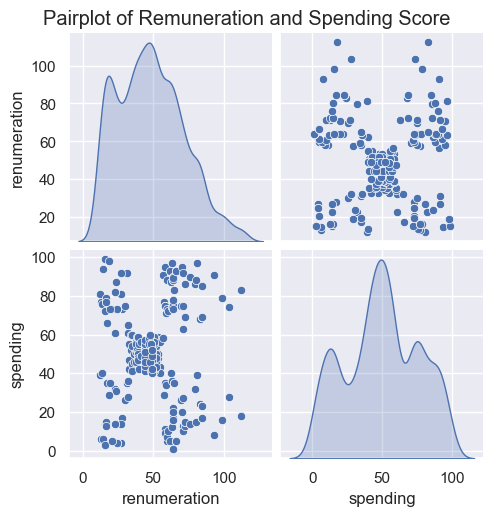

In [593]:
# Create a pairplot with Seaborn.
x = df2_clean[['renumeration', 'spending']]

sns.pairplot(df2_clean,
             vars=x,
            diag_kind='kde')

plt.suptitle('Pairplot of Remuneration and Spending Score', y=1.02)

#View data
plt.show()

## 3. Elbow and silhoutte methods

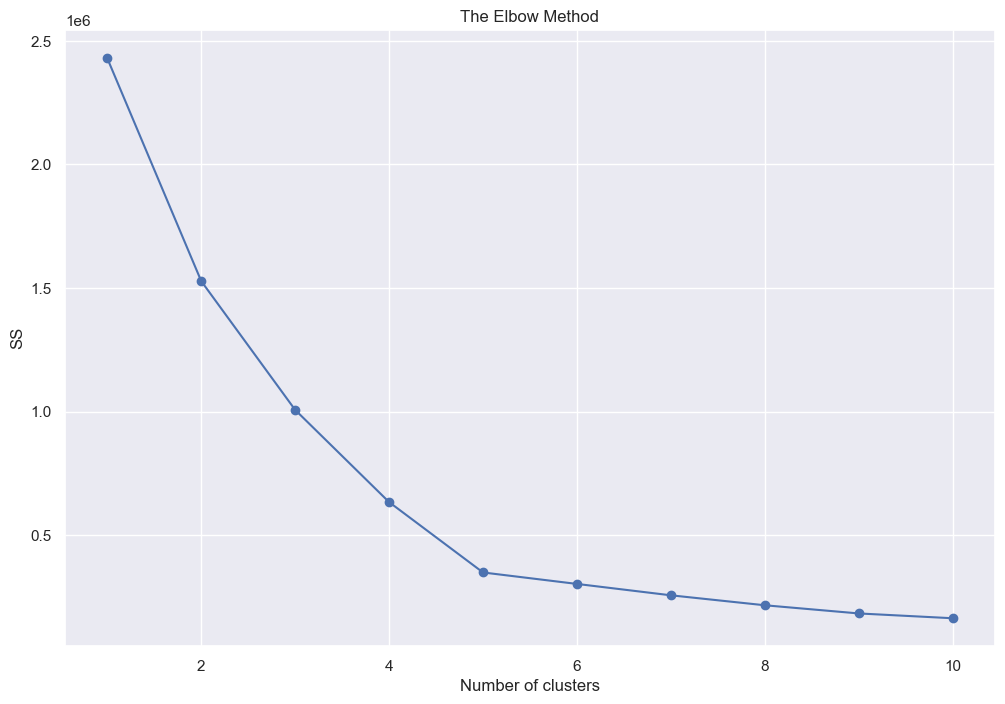

In [594]:
# Determine the number of clusters: Elbow method.

# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

#Titles
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

#View data
plt.show()

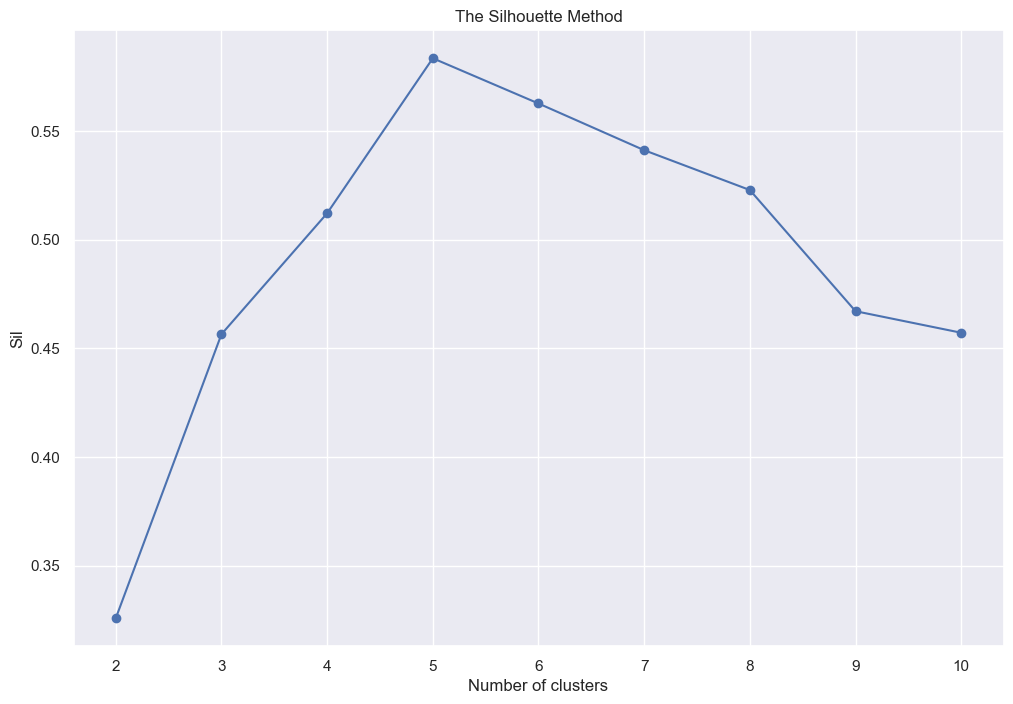

In [595]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

#View data
plt.show()

## 4. Evaluate k-means model at different values of *k*

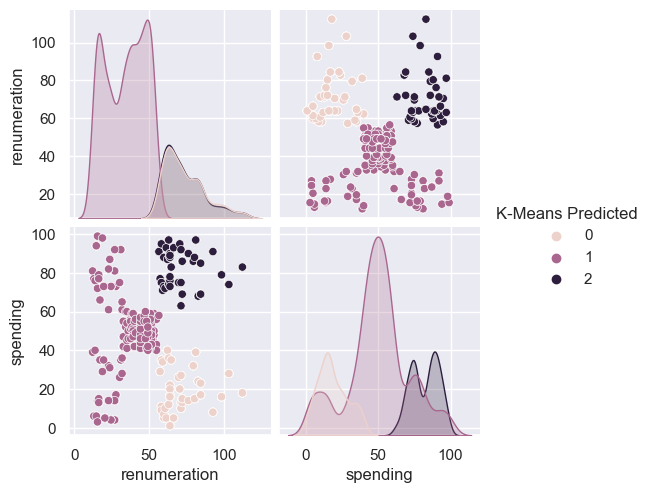

In [54]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 500,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [55]:
# Check the number of observations per predicted class with 3 clusters.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

In [56]:
# View the K-Means predicted with 3 clusters.
print(x.head())

   renumeration  spending  K-Means Predicted
0         12.30        39                  1
1         12.30        81                  1
2         13.12         6                  1
3         13.12        77                  1
4         13.94        40                  1


In [57]:
#Create a copy of the file to explore graphics with different clusters
df2_clusters=df2_clean.copy()

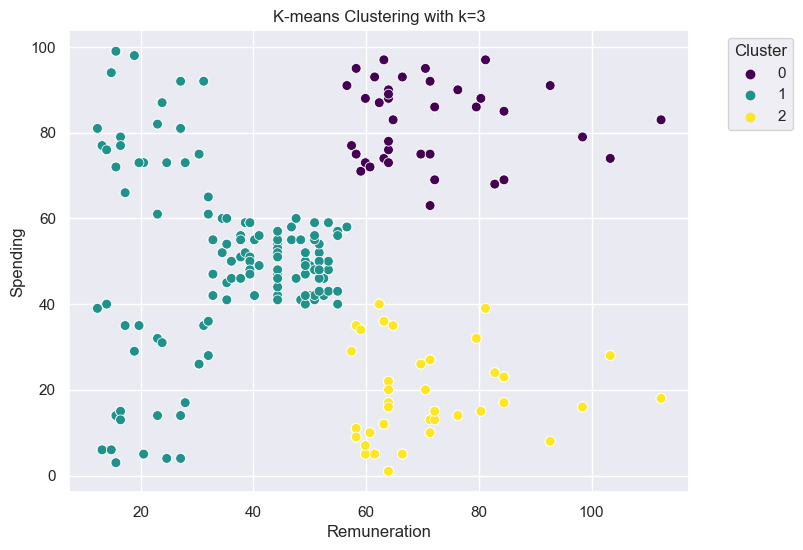

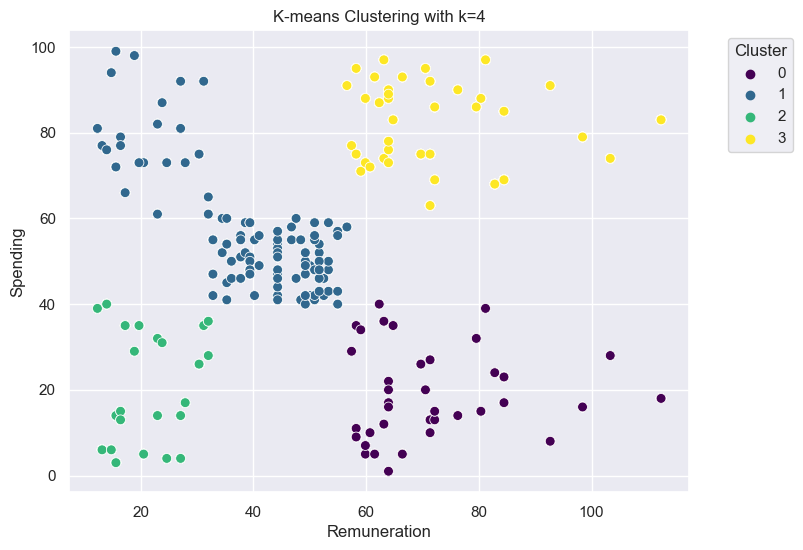

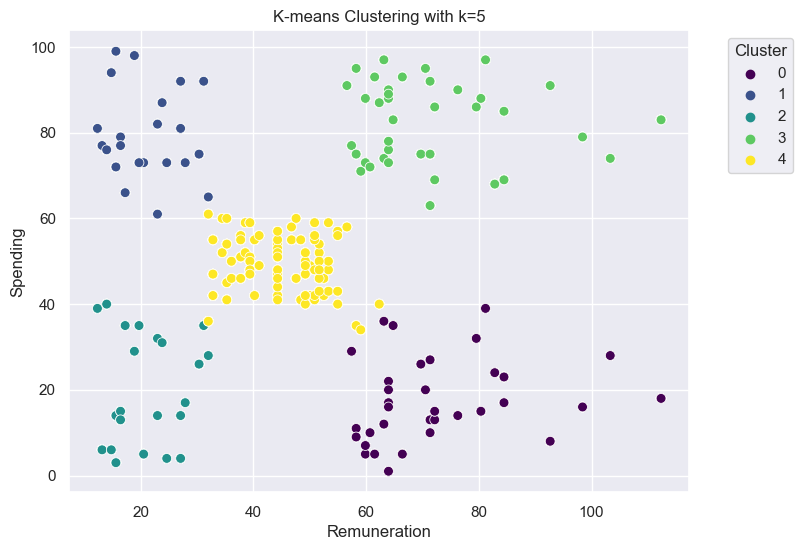

In [58]:
# Standardize the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2_clusters)

# Evaluate the k-means model for different values of k
k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df2_clusters['cluster'] = kmeans.fit_predict(scaled_data)

    # Plot the clusters for each value of k
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='renumeration', y='spending', data=df2_clusters, hue='cluster', palette='viridis', s=50)
    plt.xlabel('Remuneration')
    plt.ylabel('Spending')
    plt.title(f'K-means Clustering with k={k}')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [59]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 500,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

In [60]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

In [61]:
# Apply the final model.
# View the K-Means predicted.
print(x.head())

   renumeration  spending  K-Means Predicted
0         12.30        39                  3
1         12.30        81                  1
2         13.12         6                  3
3         13.12        77                  1
4         13.94        40                  3


<Axes: xlabel='spending', ylabel='renumeration'>

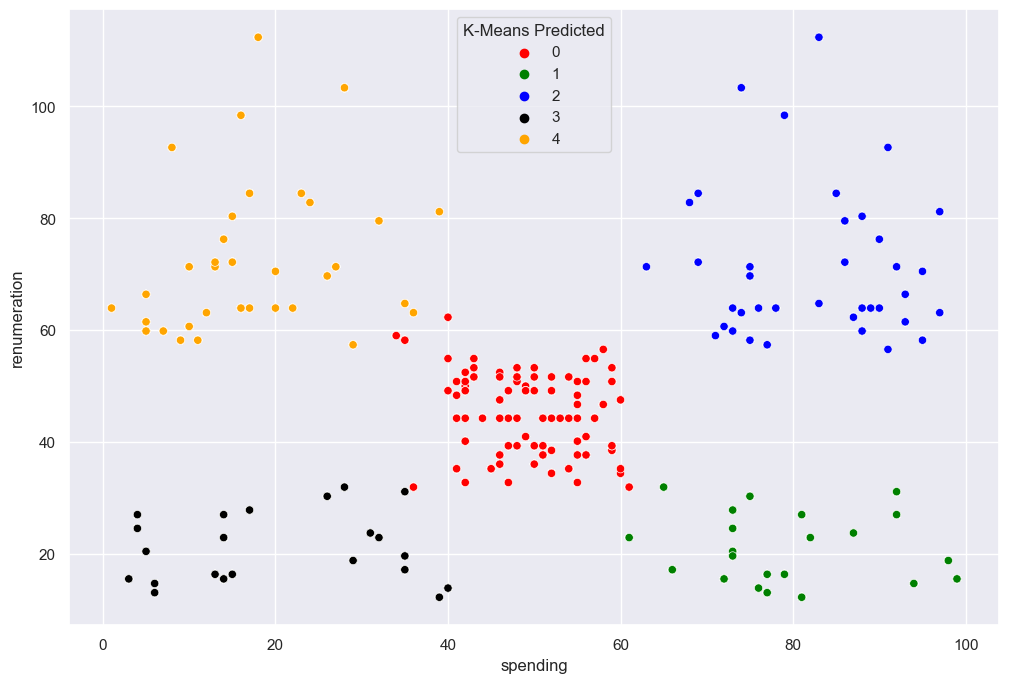

In [62]:
# Apply the final model.
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending' , 
                y ='renumeration',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

In [63]:
# Check the number of observations per predicted class.

# Fit the k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df2_clusters['cluster'] = kmeans.fit_predict(scaled_data)

# Check the number of observations per predicted class
cluster_counts = df2_clusters['cluster'].value_counts()
print(cluster_counts)

# Evaluate the cluster sizes as a percentage of total observations
cluster_sizes = cluster_counts.values / len(df2_clusters) * 100
print(cluster_sizes)

4    774
3    356
0    330
2    271
1    269
Name: cluster, dtype: int64
[38.7  17.8  16.5  13.55 13.45]


## 6. Plot and interpret the clusters

   renumeration  spending  cluster
0         12.30        39        2
1         12.30        81        1
2         13.12         6        2
3         13.12        77        1
4         13.94        40        2


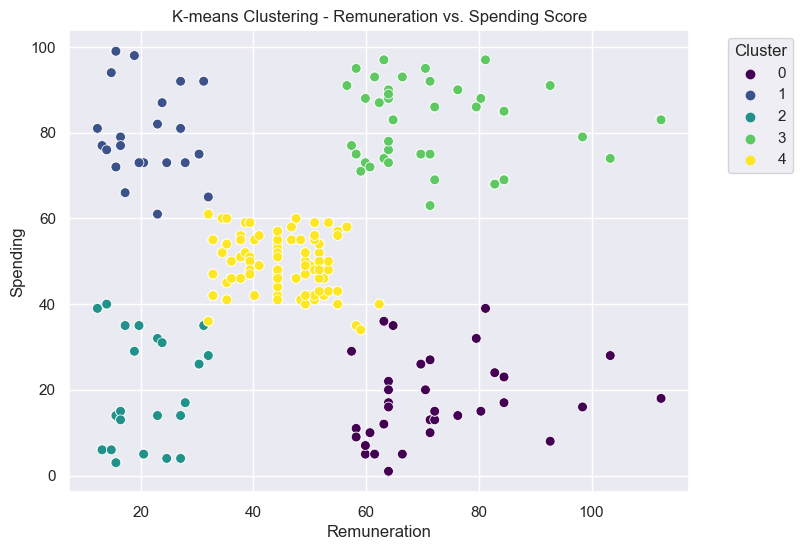

In [65]:
# View the DataFrame
print(df2_clusters.head())

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='renumeration', y='spending', data=df2_clusters, hue='cluster', palette='viridis', s=50)
plt.xlabel('Remuneration')
plt.ylabel('Spending')
plt.title('K-means Clustering - Remuneration vs. Spending Score')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 7. Discuss: Insights and observations

***Your observations here...***

Overall, this approach guides you through the entire process of data analysis, from data preparation and exploration to clustering and interpretation of results. The use of k-means clustering allows to identify distinct customer segments based on remuneration and spending scores, which can help the marketing department target specific market segments more effectively. The insights gained from this analysis can inform marketing strategies and decision-making processes.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [374]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [375]:
# Load the data set as df3.
# Create a copy of df2
df3=df2.copy()

# View DataFrame.
df3.head()
print(df3.shape)    #Number of rows and columnsprint
print(df3.info())   #Determine the metadata of the data set

(2000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending        2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


In [376]:
# Drop unnecessary columns.
# Keep the new df with review and summary only
df3_clean = df3[['review', 'summary']]

# View the DataFrame.
print(df3_clean.shape)    #Number of rows and columnsprint
print(df3_clean.info())   #Determine the metadata of the data set

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [377]:
# Explore the data.
print(df3_clean.columns)  #Column names
print(df3_clean.dtypes)   #Data types

Index(['review', 'summary'], dtype='object')
review     object
summary    object
dtype: object


In [378]:
# Determine if there are any missing values.
# Check for missing values
print(df3_clean.isnull().sum())

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [379]:
# Review: Change all to lower case and join with a space.

# Transform data to lowercase.
df3_clean['review'] = df3_clean['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_clean['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [380]:
# Summary: Change all to lower case and join with a space.

# Transform data to lowercase.
df3_clean['summary'] = df3_clean['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_clean['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [381]:
# Replace all the punctuations in review column.
# Remove punctuation.
df3_clean['review'] = df3_clean['review'].str.replace('[^\w\s]','')

# View output.
df3_clean['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [382]:
# Replace all the puncuations in summary column.
# Remove punctuation.
df3_clean['summary'] = df3_clean['summary'].str.replace('[^\w\s]','')

# View output.
df3_clean['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [383]:
df3_clean.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [384]:
df3_clean.shape

(2000, 2)

In [385]:
# Check the number of duplicate values in the COMMENTS column.
df3_clean.review.duplicated().sum()
df3_clean.summary.duplicated().sum()

649

In [386]:
# Drop duplicates.
df3d = df3_clean.drop_duplicates(subset=['review'])
df3d = df3_clean.drop_duplicates(subset=['summary'])

# Preview data.
df3d.reset_index(inplace=True)
df3d.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [387]:
df3d.shape

(1351, 3)

## 3. Tokenise and create wordclouds

In [389]:
# Create new DataFrame (copy DataFrame).
df3t = df3d.copy()

# View DataFrame.
df3t.head()
print(df3t.shape)    #Number of rows and columnsprint
print(df3t.info())   #Determine the metadata of the data set

(1351, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1351 non-null   int64 
 1   review   1351 non-null   object
 2   summary  1351 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.8+ KB
None


In [390]:
# Tokenise the words.
df3t['tokens_review'] = df3t['review'].apply(word_tokenize)

# Preview data.
df3t['tokens_review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_review, dtype: object

In [391]:
# Tokenise the words.
df3t['tokens_summary'] = df3t['summary'].apply(word_tokenize)

# Preview data.
df3t['tokens_summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_summary, dtype: object

In [397]:
df3t.head()

,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


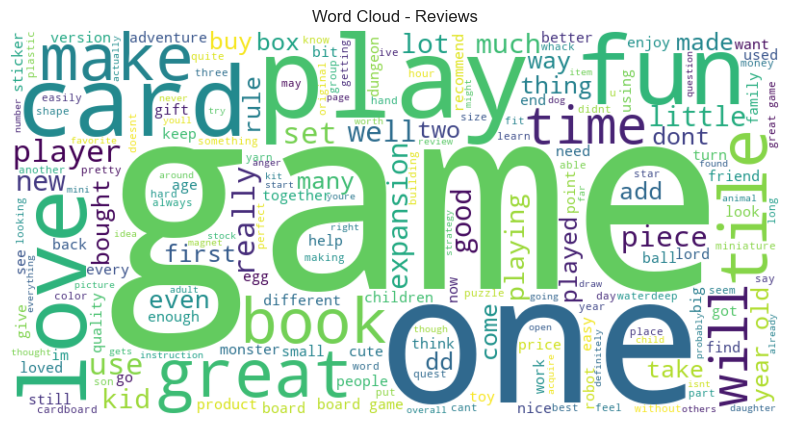

In [399]:
# Create a word cloud for 'review' column.
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df3t['tokens_review'].sum()))

# Plot the WordCloud image for 'review' column.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reviews')
plt.show()

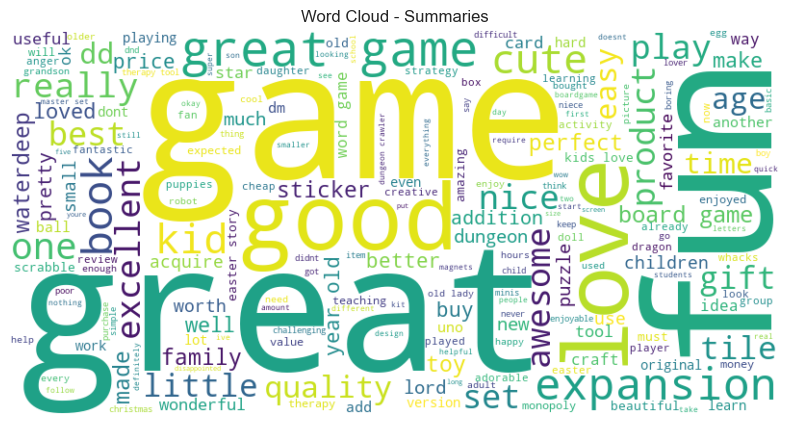

In [400]:
# Create a word cloud for 'summary' column.
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df3t['tokens_summary'].sum()))

# Plot the WordCloud image for 'summary' column.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Summaries')
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [413]:
# Define an empty list of tokens.
all_tokens_review = []

for i in range(df3t.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df3t['tokens_review'][i]

In [414]:
# Define an empty list of tokens.
all_tokens_summary = []

for i in range(df3t.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + df3t['tokens_summary'][i]

In [416]:
all_tokens=all_tokens_review+all_tokens_summary

In [417]:
# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5279, 'and': 3102, 'a': 3068, 'to': 3035, 'of': 2393, 'i': 1971, 'it': 1969, 'is': 1697, 'this': 1676, 'game': 1628, ...})

### 4b) Remove alphanumeric characters and stopwords

In [418]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
all_tokens = [word for word in all_tokens if word.isalnum()]

In [419]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in all_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [421]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

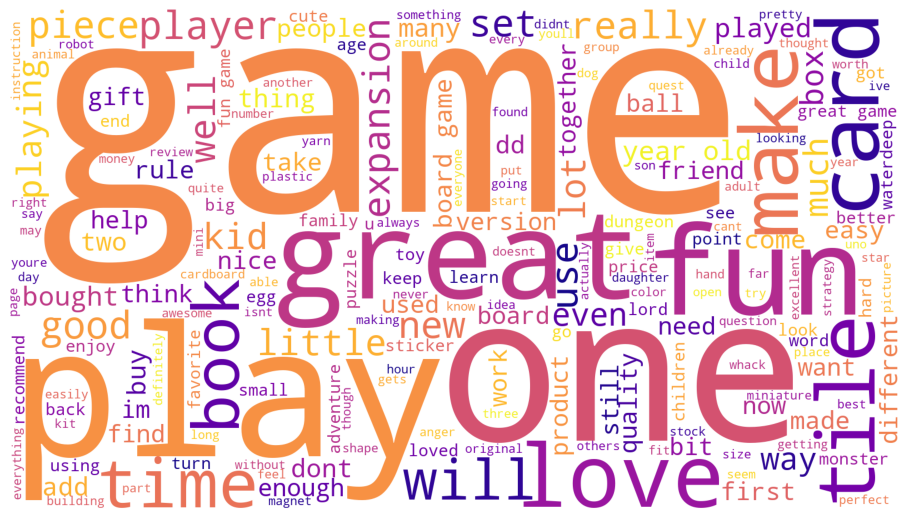

In [423]:
# Plot the WordCloud image.                        
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

### 4d) Identify 15 most common words and polarity

In [434]:
# Determine the 15 most common words.

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1628
great,629
fun,582
one,503
play,468
like,427
good,312
really,308
get,307


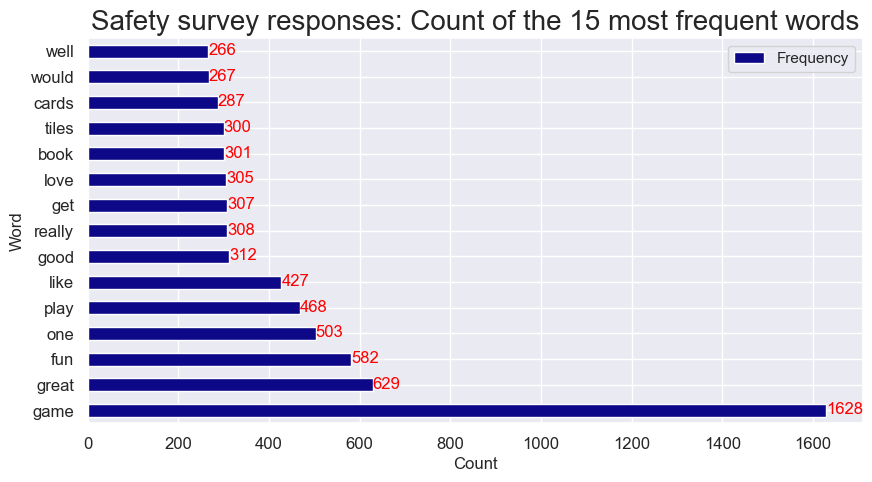

In [487]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(10, 5), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [531]:
# Import the necessary package
from textblob import TextBlob

In [532]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [533]:
# Create new DataFrame (copy DataFrame).
df4=df3d.copy()

# View DataFrame.
df4

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1346,1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1347,1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1348,1992,great game to keep the mind active we play it ...,great game to keep the mind active
1349,1994,we are retired and find this a great way to st...,a great mind game


In [534]:
# Populate a new column with polarity scores for each comment.
df4['review_polarity'] = df4['review'].apply(generate_polarity)

# Populate a new column with polarity scores for each comment.
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)

# Preview the result.
df4.head()

,index,review,summary,review_polarity,summary_polarity
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00


In [535]:
# Provided function.
def generate_subjectivity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [536]:
# Populate a new column with subjectivity scores for each comment.
df4['review_subjectivity'] = df4['review'].apply(generate_subjectivity)

# Populate a new column with subjectivity scores for each comment.
df4['summary_subjectivity'] = df4['summary'].apply(generate_subjectivity)

# Preview the result.
df4.head()

,index,review,summary,review_polarity,summary_polarity,review_subjectivity,summary_subjectivity
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15,0.486111,0.500000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80,0.442976,0.900000
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00,0.430435,0.733333
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00,0.784848,0.000000
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00,0.316667,0.000000


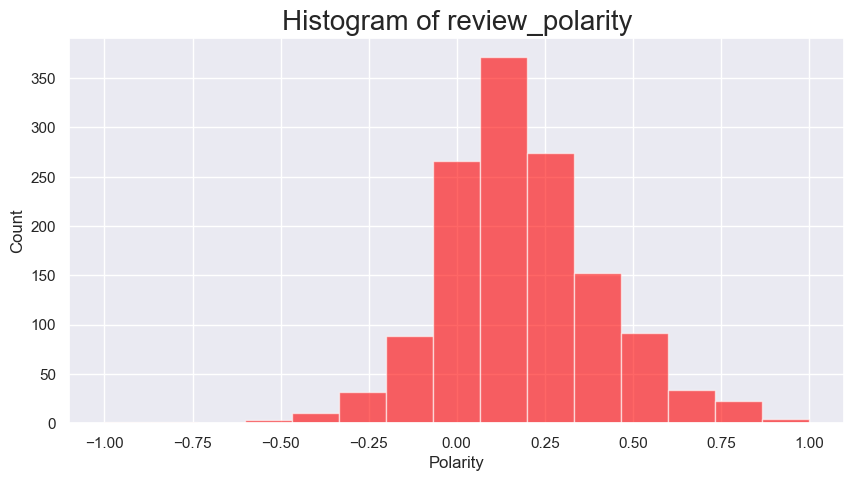

In [537]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df4['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review_polarity', fontsize=20)
          
# Histogram of review_polarity
plt.show()

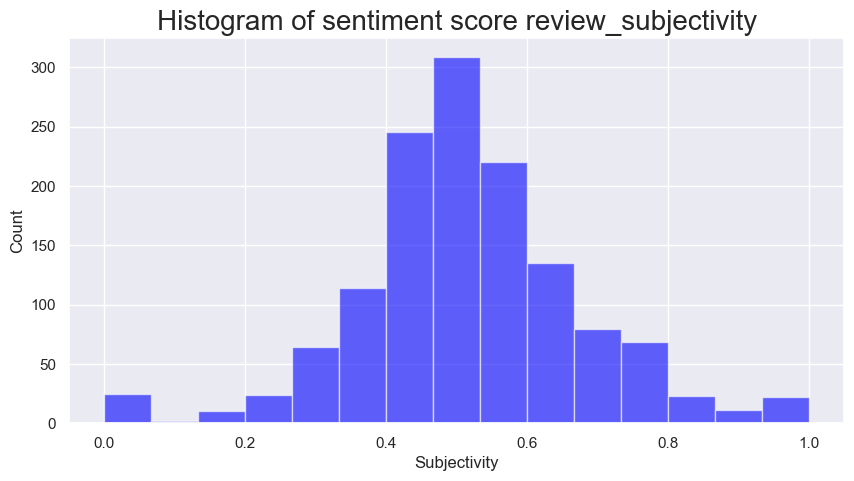

In [538]:
# Review: Create a histogram plot with bins = 15.
# Histogram of subjectivity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df4['review_subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score review_subjectivity', fontsize=20)
          
# Histogram of review sentiment score
plt.show()

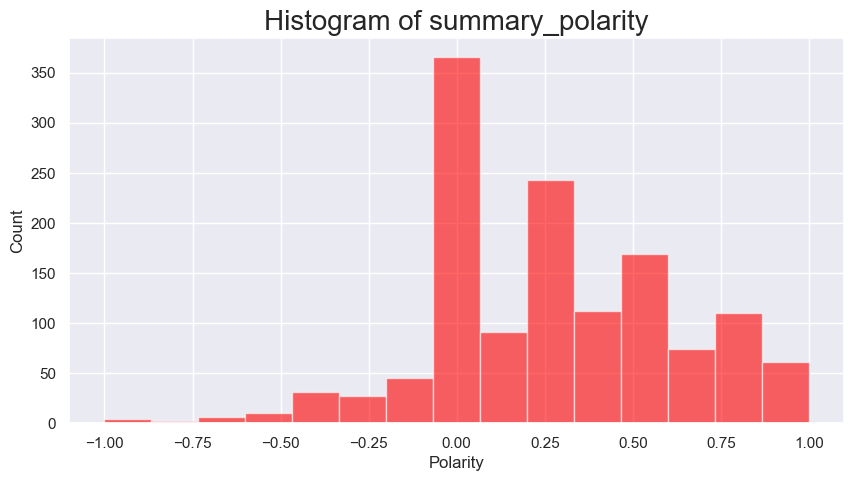

In [540]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df4['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary_polarity', fontsize=20)
          
# Histogram of summary_polarity
plt.show()

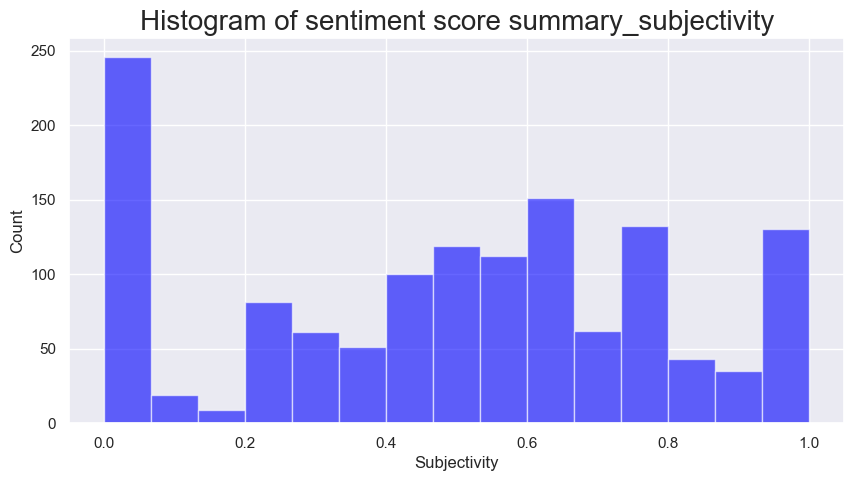

In [541]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of subjectivity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df4['summary_subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score summary_subjectivity', fontsize=20)
          
# Histogram of summary sentiment score
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [542]:
# Top 20 negative reviews.
# Create a DataFrame.
top_negative_reviews = df4.nsmallest(20, 'review_polarity')['review']

# View output.
print('Top 20 Negative Reviews:')
print(top_negative_reviews)

Top 20 Negative Reviews:
165     booo unles you are patient know how to measure...
147                     incomplete kit very disappointing
267     one of my staff will be using this game soon s...
90      i bought this as a christmas gift for my grand...
141     i sent this product to my granddaughter the po...
251     my 8 yearold granddaughter and i were very fru...
382     i purchased this on the recommendation of two ...
312     this game although it appears to be like uno a...
355     my son loves playing this game it was recommen...
714     if you like me used to play dd but now you and...
1013    you can play the expansions one at a time or a...
724     if you play dungeons and dragons then you will...
601     i was a bit disappointed in the quality of the...
331     very fun game to use with kids working on hand...
297     i really like this game it helps kids recogniz...
389     i am a therapist for children and this game is...
338     confusing instructions and its not for 

In [543]:
# Top 20 negative summaries.
# Create a DataFrame.
top_negative_summaries = df4.nsmallest(20, 'summary_polarity')['summary']

# View output.
print('Top 20 Negative Summaries:')
print(top_negative_summaries)

Top 20 Negative Summaries:
17                          the worst value ive ever seen
165      boring unless you are a craft person which i am 
588                                                boring
838     before this i hated running any rpg campaign d...
1       another worthless dungeon masters screen from ...
116                                          disappointed
266     promotes anger instead of teaching calming met...
635              too bad this is not what i was expecting
638                          bad qualityall made of paper
144       at age 31 i found these very difficult to make 
75                                       small and boring
368                                            mad dragon
576                                         disappointing
724     then you will find this board game to be dumb ...
267                                    anger control game
59                              really small disappointed
360                                 its uno f

In [545]:
# Top 20 positive reviews.
top_positive_reviews = df4.nlargest(20, 'review_polarity')['review']

# View output.
print('Top 20 Positive Reviews:')
print(top_positive_reviews)

Top 20 Positive Reviews:
564                                               perfect
1082    my daughter loves her stickers awesome seller ...
1336         perfect for tutoring my grandson in spelling
891     the best part i see is the box what a wonderfu...
498     great quality very cute and perfect for my tod...
31      the pictures are great  ive done one and gave ...
336         great seller happy with my purchase 5 starrrr
439                            great easter gift for kids
491                                       these are great
575                                                 great
693     bought this because i wanted it all these dd g...
825                           husband seems happy with it
827           great accessory to use with the playing mat
829     great price arrived on time with no damage wil...
894     this is a great accessory to the starter set i...
1077    my granddaughter loves these so happy to find ...
1115    great doll to go with the book  animals

In [547]:
# Top 20 positive summaries.
top_positive_summaries = df4.nlargest(20, 'summary_polarity')['summary']

# View output.
print('Top 20 Positive Summaries:')
print(top_positive_summaries)

Top 20 Positive Summaries:
5                                    best gm screen ever
23                                     wonderful designs
27                                               perfect
61     theyre the perfect size to keep in the car or ...
107                              perfect for preschooler
112               awesome sticker activity for the price
132                                         awesome book
133                      he was very happy with his gift
150                                              awesome
166             awesome and welldesigned for 9 year olds
337                                            excellent
389                               excellent therapy tool
407    the pigeon is the perfect addition to a school...
423                            best easter teaching tool
462                                            wonderful
466                all f the mudpuppy toys are wonderful
471                                       awesome puzzle
476 

## 7. Discuss: Insights and observations

***Your observations here...***

In summary, this approach involves extracting valuable insights from customer reviews using NLP techniques. By analyzing sentiment, identifying commonly used words, and exploring positive/negative reviews, the marketing department can gain a better understanding of customer perceptions and make informed decisions for future campaigns. Further exploration could involve advanced sentiment analysis methods, topic modeling, or sentiment changes over different product releases.

# 